In [1096]:
import pandas as pd
import numpy as np

import openpyxl

data = pd.read_excel('FR2209_assessment_data.xlsx', index_col=0, header=0)
data = data.iloc[:121,:]

stocks = data.loc[:,['BYD','DNB','IAG','SAM','CHM','X']]

returns = stocks.pct_change()
std = returns.std()
mean = returns.mean()


returns



,BYD,DNB,IAG,SAM,CHM,X
date,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.062767,0.065856,0.075332,0.085985,0.065668,-0.065486
2013-03-29,0.258752,-0.017578,0.060728,0.055986,0.109166,-0.064299
2013-04-30,0.451028,0.115651,0.098254,-0.015033,-0.026455,-0.087180
2013-05-31,0.085833,0.018199,0.005871,0.059864,0.024632,-0.003596
...,...,...,...,...,...,...
2022-08-31,-0.019456,-0.092640,-0.129345,0.170433,-0.068707,-0.030908
2022-09-30,-0.121827,-0.130526,-0.159940,-0.011528,-0.170479,-0.207696
2022-10-31,0.212171,0.037127,0.319528,-0.112438,-0.085301,0.123621


In [1097]:
mean

BYD    0.586236
DNB    0.402238
IAG    0.261613
SAM    0.252762
CHM    0.202081
X      0.193203
dtype: float64

In [1098]:
#asssume the risk free of 0.1%, calculate the excess return for each stock
R_f = 0.001
excessret = mean - R_f
excessret

BYD    0.585236
DNB    0.401238
IAG    0.260613
SAM    0.251762
CHM    0.201081
X      0.192203
dtype: float64

In [1099]:
#sharpe for each stock
sharpe = excessret/std
df = pd.DataFrame({'Mean': mean, 'Volatility': std, 'Sharpe': sharpe})
df


,Mean,Volatility,Sharpe
BYD,0.586236,6.202285,0.094358
DNB,0.402238,4.574157,0.087718
IAG,0.261613,1.935373,0.134658
SAM,0.252762,2.288947,0.109990
CHM,0.202081,1.798760,0.111788
X,0.193203,1.990425,0.096564


In [1100]:
#returns variance / covariance matrix 
VarCov_Mat = returns.cov()
VarCov_Mat

,BYD,DNB,IAG,SAM,CHM,X
BYD,38.468336,28.357208,7.463509,-0.101051,-0.034629,12.280237
DNB,28.357208,20.922912,5.493531,-0.077406,-0.023190,9.055468
IAG,7.463509,5.493531,3.745670,-0.012002,-0.036343,2.407210
SAM,-0.101051,-0.077406,-0.012002,5.239277,0.368444,0.004649
CHM,-0.034629,-0.023190,-0.036343,0.368444,3.235537,-0.010240
X,12.280237,9.055468,2.407210,0.004649,-0.010240,3.961793


In [1101]:
import numpy as np
from itertools import combinations, permutations, product

# Generate permutations of weights in multiples of 0.1
permutations = product(range(11), repeat=len(mean))

# Filter permutations where the sum equals 10 (1 in multiples of 0.1)
valid_permutations = [p for p in permutations if sum(p) == 10]

# Convert permutations to multiples of 0.1 and normalize each permutation
normalized_permutations = [[weight / 10 for weight in p] for p in valid_permutations]


In [1102]:
weighted_ret = [[weight * mean for weight, mean in zip(p, mean)] for p in normalized_permutations]
# Sum of weights method
portfolio_rets = [sum(weights) for weights in weighted_ret]
# portfolio_rets

In [1103]:
# w^T mean method
portfolio_rets2 = np.dot(normalized_permutations, mean)

In [1104]:
# Initialize an empty list to store portfolio variances
portfolio_variances = []

# Iterate over each normalized permutation of weights
for weights in normalized_permutations:
    # Calculate portfolio variance using the given formula
    portfolio_variance = np.dot(np.dot(np.transpose(weights),VarCov_Mat),weights)
    # Append the portfolio variance to the list
    portfolio_variances.append(portfolio_variance)

portfolio_std = np.sqrt(portfolio_variances)

#portfolio_variances = np.dot(np.dot(normalized_permutations, VarCov_Mat), np.transpose(normalized_permutations))
portfolio_std
 

array([1.99042523, 1.79987894, 1.63146926, ..., 5.7044054 , 6.03927803,
       6.20228478])

Text(0, 0.5, 'Returns')

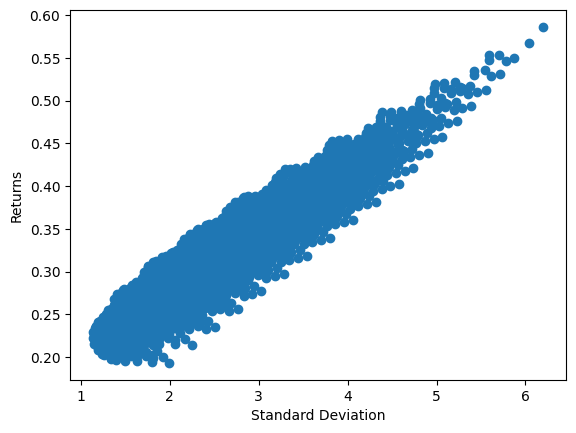

In [1105]:
import matplotlib.pyplot as plt
plt.scatter(portfolio_std, portfolio_rets)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

In [1106]:

sharpe_portolios = ((np.array(portfolio_rets) - R_f )) / portfolio_std
sharpe_portolios

array([0.096564  , 0.10728007, 0.11889826, ..., 0.09690298, 0.0938583 ,
       0.09435816])

In [1107]:
max_sharpe_index = np.argmax(sharpe_portolios)
max_sharpe = max(sharpe_portolios)
# Retrieve the weights of the corresponding portfolio
optimal_weights = normalized_permutations[max_sharpe_index]
retmaxsharpe = portfolio_rets[max_sharpe_index]
stdmaxsharpe = portfolio_std[max_sharpe_index]
print('The portfolio with maximum Sharpe Ratio is: ', optimal_weights, ' with ratio: ', max_sharpe, ' The return on this portfolio is: ', retmaxsharpe, ' and Standard Deviation: ', stdmaxsharpe)

The portfolio with maximum Sharpe Ratio is:  [0.0, 0.0, 0.4, 0.3, 0.3, 0.0]  with ratio:  0.20171631855781386  The return on this portfolio is:  0.241098126756847  and Standard Deviation:  1.1902761684004883


In [1108]:
min_std_index = np.argmin(portfolio_std)
min_std = min(portfolio_std)
# Retrieve the weights of the corresponding portfolio
min_std_weights = normalized_permutations[min_std_index]
retminstd = portfolio_rets[min_std_index]
print('The portfolio with minimum Standard Deviation is: ', min_std_weights, ' with Standard Deviation: ', min_std, ' The return on this portfolio is: ', retminstd)

The portfolio with minimum Standard Deviation is:  [0.0, 0.0, 0.2, 0.2, 0.4, 0.2]  with Standard Deviation:  1.1309472530743756  The return on this portfolio is:  0.2223479987414559


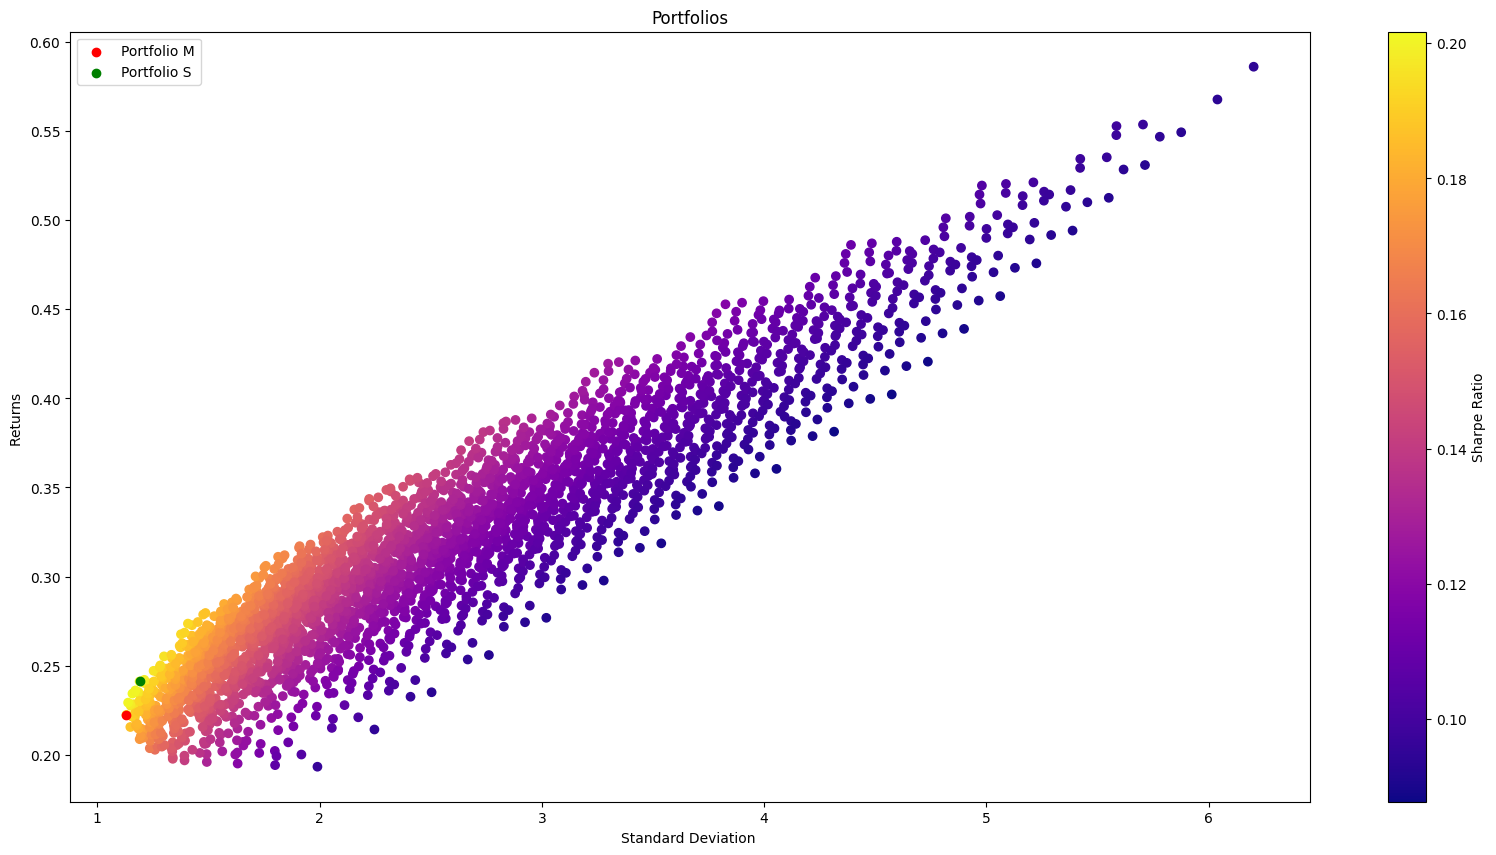

In [1109]:
plt.figure(figsize=(20, 10))
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation ')
plt.ylabel('Returns ')
plt.show()

In [1110]:
#Ones Vector
one = np.empty((1, 6))
one[:] = 1

#Calculate A, B, and F
A = np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), mean)
B = np.dot(np.dot(mean.transpose(), np.linalg.inv(VarCov_Mat)), mean)
F = float(np.dot(np.dot(one, np.linalg.inv(VarCov_Mat)), one.transpose()))
#Calculate D
D = B * F - A ** 2

In [1111]:
#Calculate Alpha_0
alpha_0 = ((np.dot(B*np.linalg.inv(VarCov_Mat), one.transpose().reshape(6)) - np.dot(A * np.linalg.inv(VarCov_Mat), mean)))/D
alpha_0 = alpha_0.flatten()
alpha_0

array([-0.85153817,  0.66575514,  0.02235107,  0.00914527,  0.02696382,
        1.12732286])

In [1112]:
#Calculate Alpha_1
alpha_1 = (np.dot((F*np.linalg.inv(VarCov_Mat)),mean) - np.dot((A*np.linalg.inv(VarCov_Mat)),one.transpose().reshape(6)))/D
alpha_1 = alpha_1.flatten()
alpha_1

array([ 11.29176144, -16.84050138,   0.68228852,   0.49061001,
         0.71200326,   3.66383815])

In [1113]:
MinPortfolioRet = min(portfolio_rets)
MaxPortfolioRet = max(portfolio_rets)
C = np.arange(MinPortfolioRet, MaxPortfolioRet, 0.0001)
StdVector = []

for ret in C:
    w = alpha_0 + alpha_1 * ret
    Stds = np.sqrt((np.dot(np.dot(np.transpose(w), VarCov_Mat), w)))
    StdVector.append(Stds)

FrontierMinStd = min(StdVector)

df = pd.DataFrame({"C": C, "Std": StdVector})
minstdpoint = df["Std"].idxmin()

NegC = df[df["C"] < df["C"][minstdpoint]]
PosC = df[df["C"] >= df["C"][minstdpoint]]


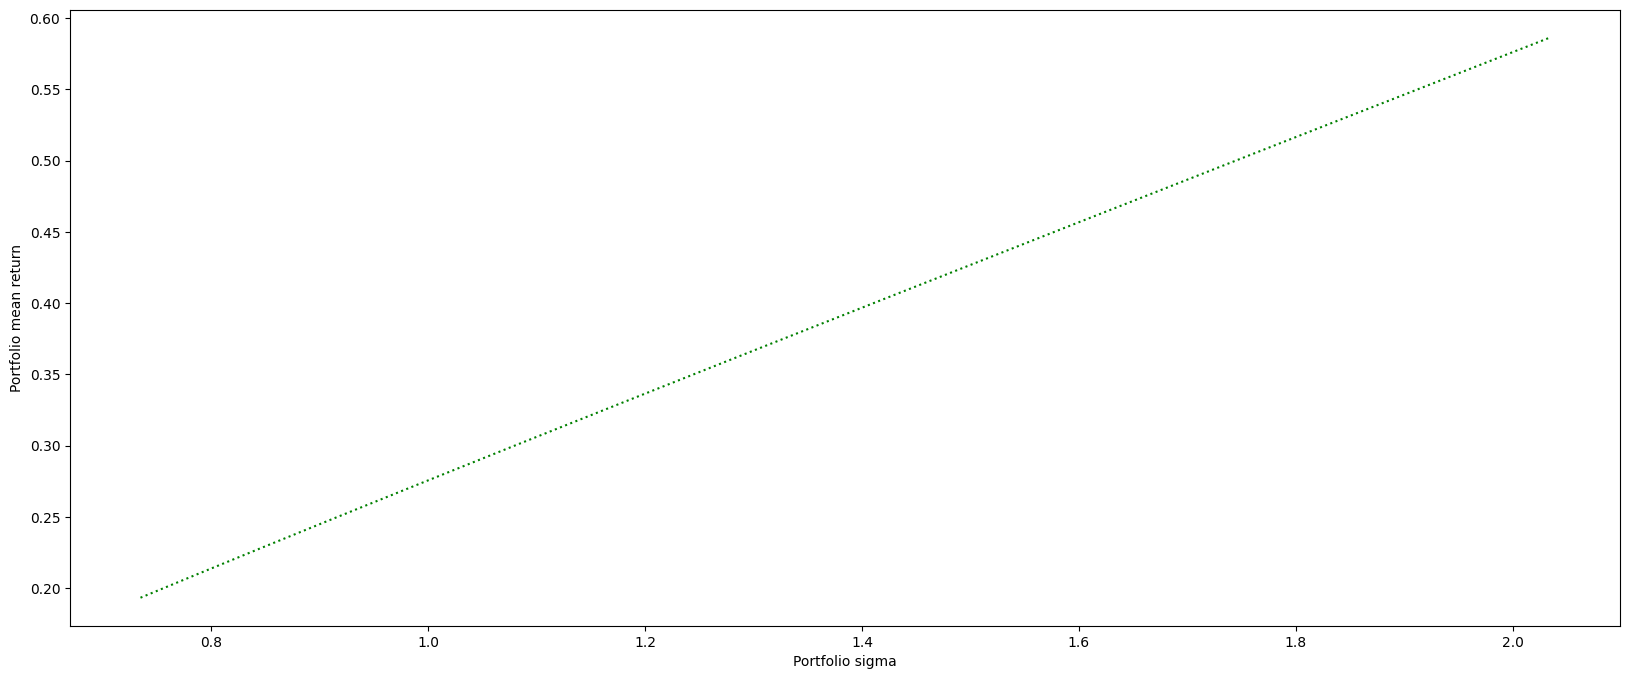

In [1114]:
plt.figure(figsize=(20, 8))
plt.plot( NegC['Std'], NegC['C'], linestyle = 'dotted', color='r')
plt.plot( PosC['Std'], PosC['C'],  linestyle = 'dotted', color='g')
plt.xlabel("Portfolio sigma")
plt.ylabel("Portfolio mean return")
plt.show()

In [1115]:
df['Sharpe'] = (df['C'] - R_f) / df['Std']
maximumsharpe = (df['Sharpe']).max()

StdVector = np.array(StdVector)

step = max(StdVector) / len(C)

vec = np.arange(0, max(StdVector), step)
CML = R_f + maximumsharpe * vec 
df['CML'] = CML
df


,C,Std,Sharpe,CML
0,0.193203,0.734567,0.261655,0.001000
1,0.193303,0.734883,0.261679,0.001149
2,0.193403,0.735199,0.261703,0.001298
3,0.193503,0.735514,0.261726,0.001447
4,0.193603,0.735830,0.261750,0.001595
...,...,...,...,...
3926,0.585803,2.032818,0.287681,0.585459
3927,0.585903,2.033154,0.287683,0.585608
3928,0.586003,2.033490,0.287684,0.585757
3929,0.586103,2.033826,0.287686,0.585906


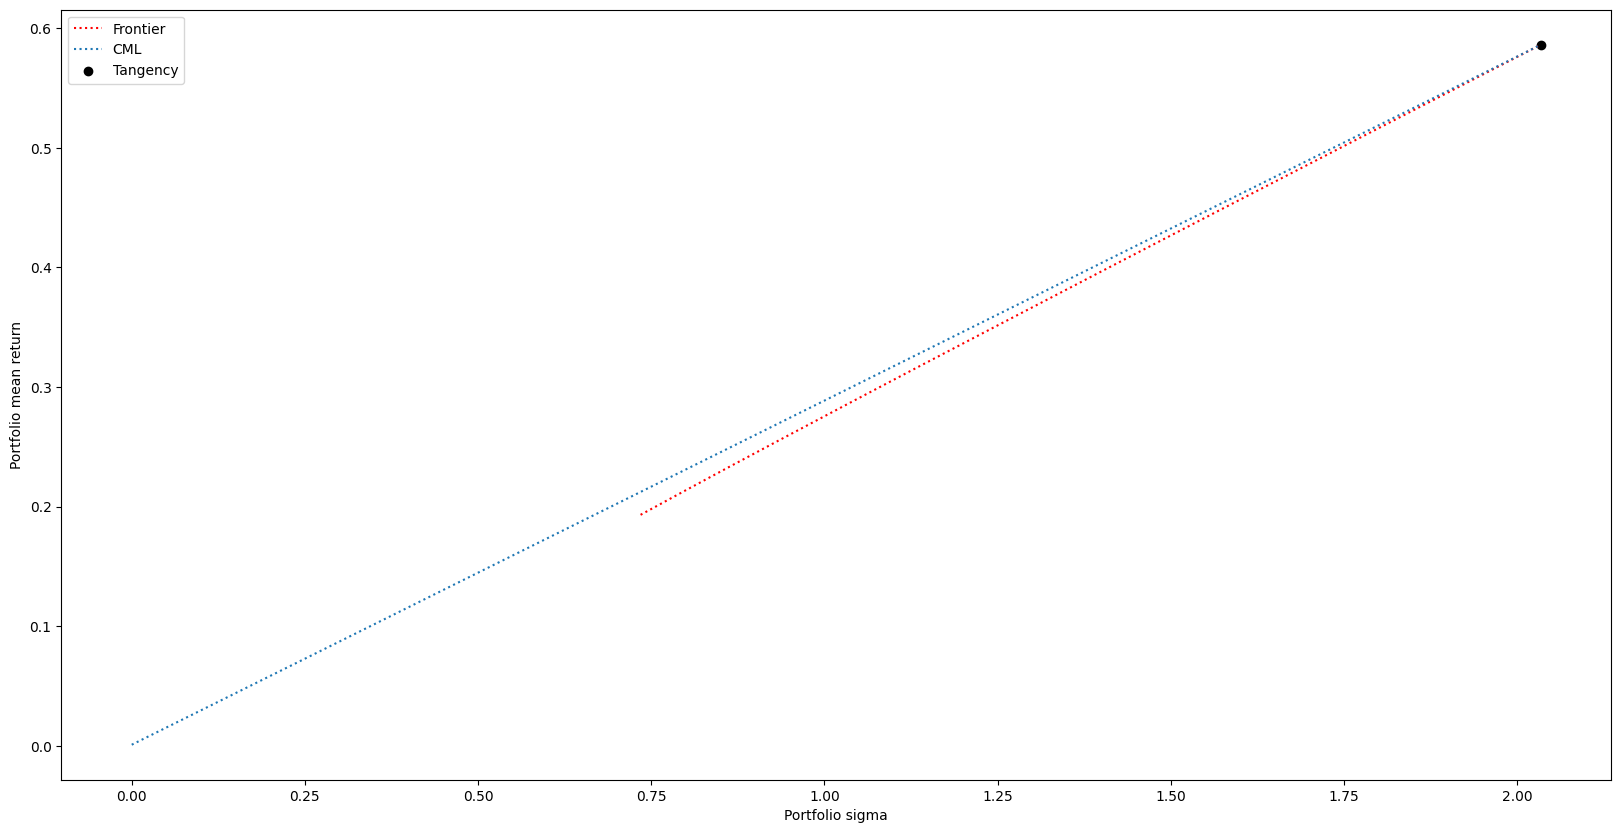

In [1116]:
index_of_max_sharpe = df['Sharpe'].idxmax()
# Find the value of the 'Std' column at the index of the maximum Sharpe ratio
Tangency_std = df.loc[index_of_max_sharpe, 'Std']
Tangency_ret = df.loc[index_of_max_sharpe, 'C']

plt.figure(figsize=(20, 10))
plt.plot(StdVector, C, linestyle = 'dotted', color='r' , label="Frontier")
plt.plot(vec , CML ,linestyle = 'dotted', label="CML" )
plt.scatter(Tangency_std, Tangency_ret, marker='o', color='black', label='Tangency')
plt.legend()
plt.xlabel("Portfolio sigma")
plt.ylabel("Portfolio mean return")
plt.show()

In [1117]:
#Target return per month = 1%
Traget = 0.01
Vol_p = (Traget - R_f) / maximumsharpe
weight_T = np.round((Vol_p / Tangency_std),2)
weight_rf = 1 - weight_T
print('The optimal allocation is: ', weight_T, 'on the tangency portfolio and ', weight_rf, 'on the risk free asset')

The optimal allocation is:  0.02 on the tangency portfolio and  0.98 on the risk free asset


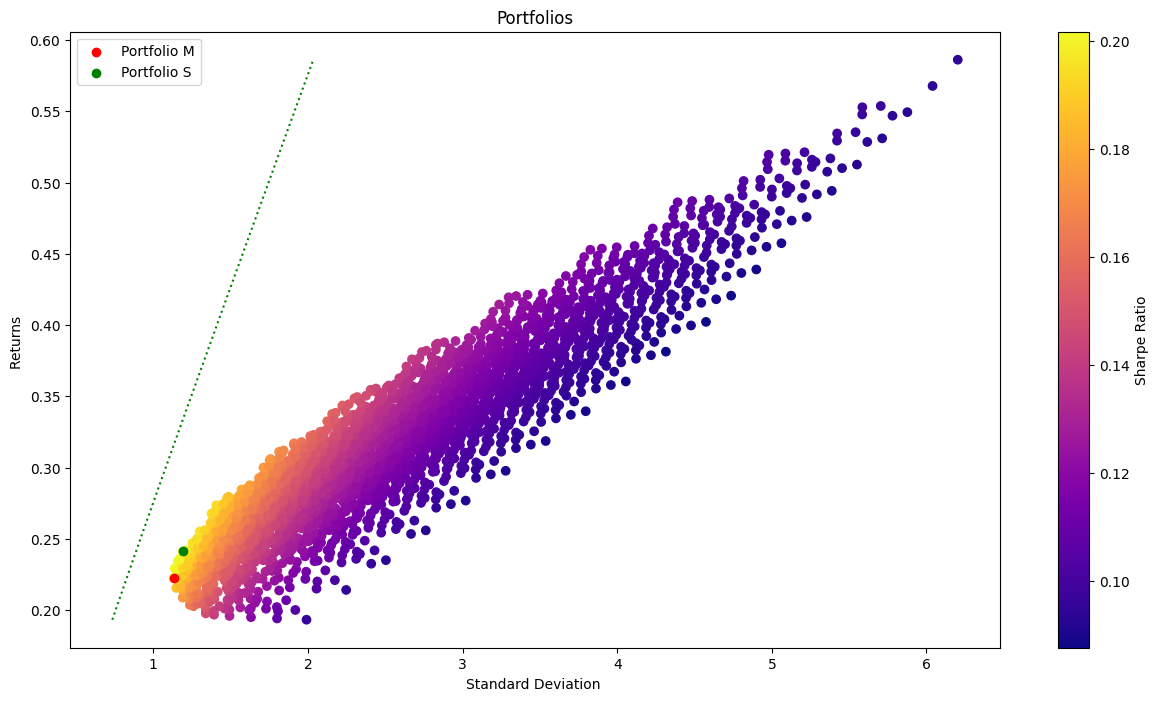

In [1118]:
plt.figure(figsize=(15, 8))
plt.plot( NegC['Std'], NegC['C'], linestyle = 'dotted', color='r')
plt.plot( PosC['Std'], PosC['C'],  linestyle = 'dotted', color='g')
plt.scatter(portfolio_std, portfolio_rets, c=sharpe_portolios, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(min_std, retminstd, color='r', label='Portfolio M')
plt.scatter(stdmaxsharpe, retmaxsharpe, color='g', label='Portfolio S')
plt.legend(loc='upper left')
plt.title('Portfolios')
plt.xlabel('Standard Deviation ')
plt.ylabel('Returns ')
plt.show()

In [1119]:
Tangency_Monthly_Rets = returns.dot(optimal_weights)

In [1120]:
Tangency_Portfolio_Mean = Tangency_Monthly_Rets.mean()
Tangency_Portfolio_Mean

0.24109812675684703

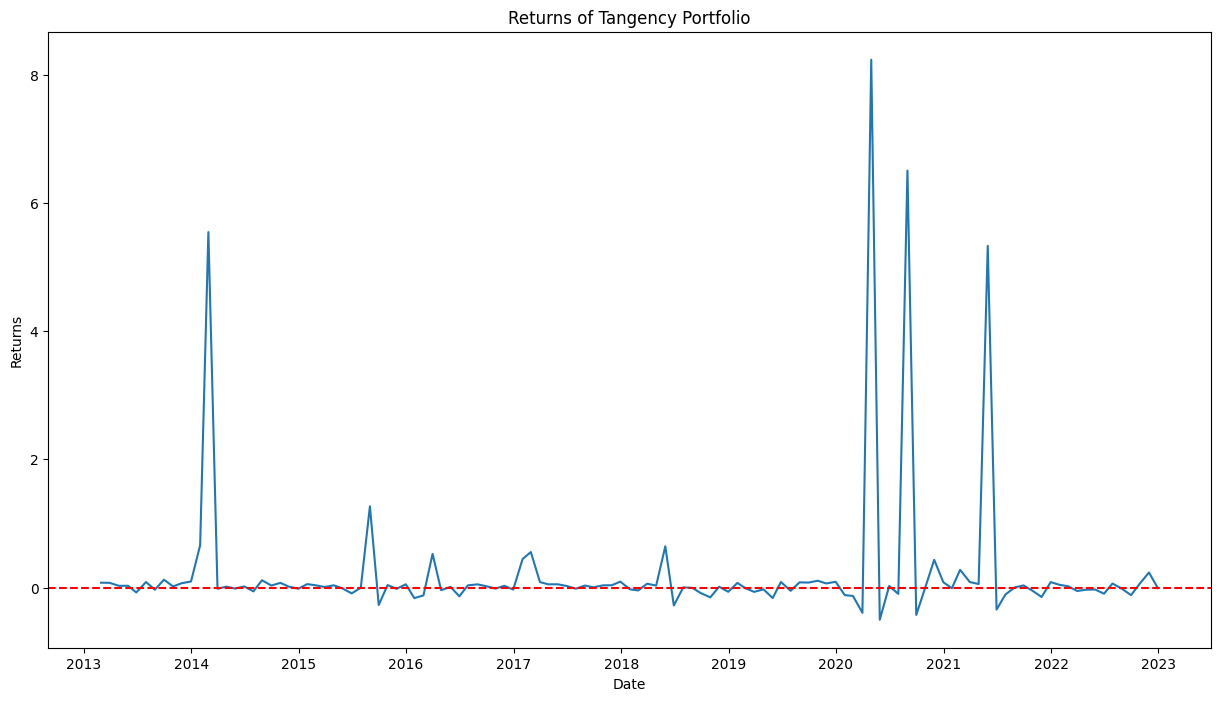

In [1121]:
plt.figure(figsize=(15, 8))
plt.plot(Tangency_Monthly_Rets)
plt.title('Returns of Tangency Portfolio')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [1122]:
print('The descriptive Statistics for the tangency portfolio: ')
print(Tangency_Monthly_Rets.describe())
print('meadian', Tangency_Monthly_Rets.median())

The descriptive Statistics for the tangency portfolio: 
count    119.000000
mean       0.241098
std        1.190276
min       -0.501767
25%       -0.033887
50%        0.020086
75%        0.072511
max        8.232731
dtype: float64
meadian 0.02008565164076843


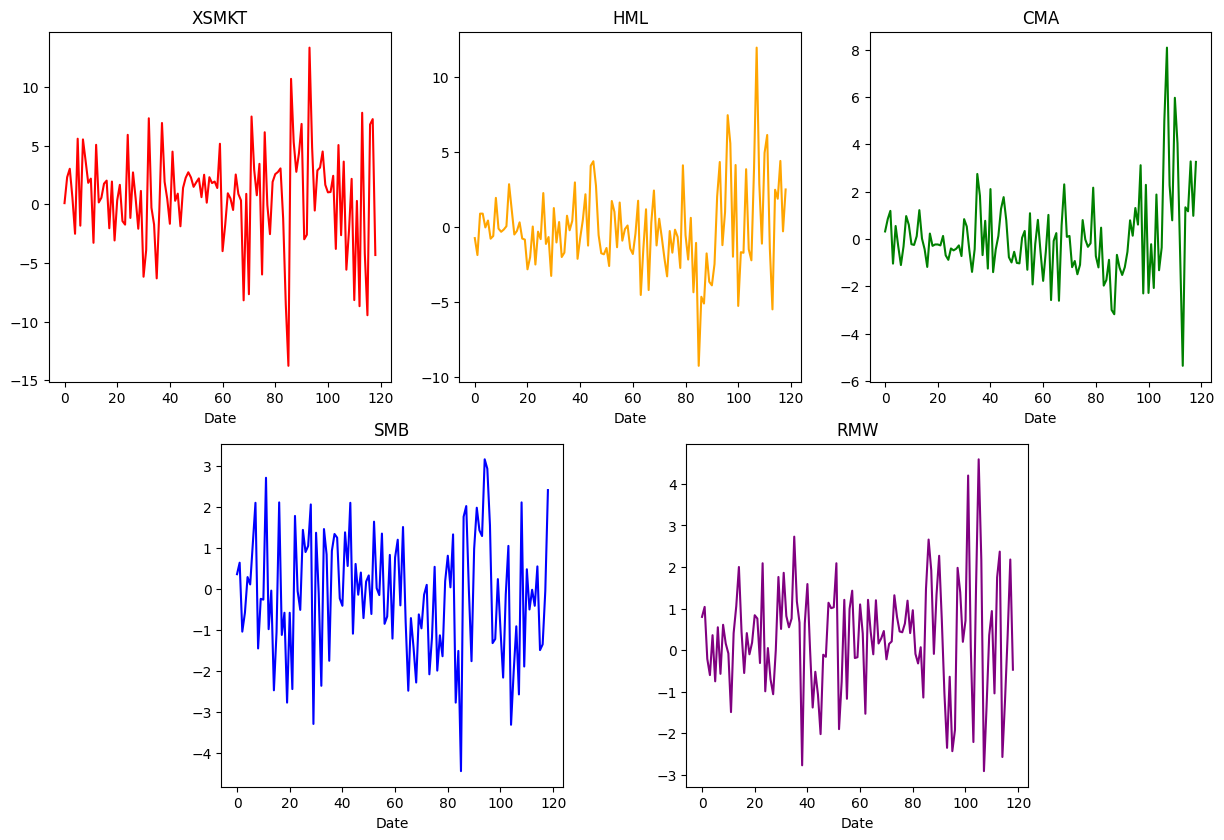

In [1123]:
factors = pd.read_excel('/Users/oscarxue/Downloads/FR2209_assessment_data_factors.xlsx')

fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[1][2].set_visible(False)


axs[0,0].plot(factors['XSMKT'], color='red')
axs[0,0].set_xlabel('Date')
axs[0,0].set_title("XSMKT")

axs[1,0].plot(factors['SMB'], color='blue')
axs[1,0].set_xlabel('Date')
axs[1,0].set_title("SMB")

axs[0,1].plot(factors['HML'], color='orange')
axs[0,1].set_xlabel('Date')
axs[0,1].set_title("HML")

axs[1,1].plot(factors['RMW'], color='purple')
axs[1,1].set_xlabel('Date')
axs[1,1].set_title("RMW")

axs[0,2].plot(factors['CMA'], color='green')
axs[0,2].set_xlabel('Date')
axs[0,2].set_title("CMA")

axs[1][0].set_position([0.24,0.125,0.228,0.343])
axs[1][1].set_position([0.55,0.125,0.228,0.343])

/var/folders/9_/mqsyyrcx6n93sgb32yjd96140000gn/T/ipykernel_28621/1453293376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(factors.corr(),annot = True )


<AxesSubplot: >

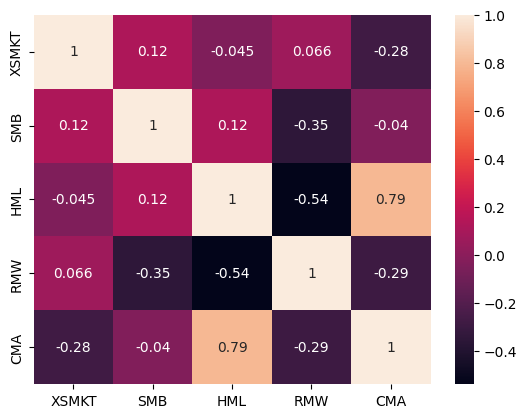

In [1124]:
import seaborn as sns
sns.heatmap(factors.corr(),annot = True )

In [1125]:
factors 

,Date,XSMKT,SMB,HML,RMW,CMA
0,2013-02-28,0.09,0.36,-0.73,0.80,0.32
1,2013-03-29,2.30,0.64,-1.86,1.04,0.84
2,2013-04-30,3.02,-1.04,0.90,-0.21,1.19
3,2013-05-31,0.56,-0.58,0.90,-0.60,-1.04
4,2013-06-28,-2.52,0.29,-0.02,0.36,0.55
...,...,...,...,...,...,...
114,2022-08-31,-4.22,0.55,2.49,-2.57,1.34
115,2022-09-30,-9.46,-1.49,1.89,-1.21,1.17
116,2022-10-31,6.79,-1.35,4.41,0.36,3.28
117,2022-11-30,7.25,-0.05,-0.28,2.18,0.98


In [1126]:
import statsmodels.api as sm
Tangency_Monthly_Rets.name = 'Returns'
factors = factors.rename(columns={'Date': 'date'})
merged_df = pd.merge(Tangency_Monthly_Rets, factors, on='date')
merged_df = merged_df.rename(columns={'date': 'Date'})
X = factors[['XSMKT', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)

y = merged_df['Returns']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.414
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00655
Time:                        19:04:41   Log-Likelihood:                -180.71
No. Observations:                 119   AIC:                             373.4
Df Residuals:                     113   BIC:                             390.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1427      0.109      1.306      0.1